# Neural Network 影像辨識 MNIST(實驗)
MNIST圖庫內含手寫數字0-9共10類圖片，training_images有60000張圖片，test_images有10000張圖片，每張為灰階28x28像素的圖片。

![替代文字](https://2796f6da-a-54a11a3a-s-sites.googlegroups.com/a/swjh.tyc.edu.tw/zhan-zhi-jie-ce-shi-yong/home/mnist.jpg?attachauth=ANoY7crTWmiUoEVS3O3bVp0l6dRtTxUyqliFuJc1477a3AQ1Jsc54I0tmiY5f9bReJ2jiERbrgVbloDa29yee3ieRtELDvXUDblUkcTSs6VvXeGD9DknApbgkHe0-Eme8vwuiyXgtIxGctDSiAmQlgoh3erM-8cE54nCnt5p2InR0zAS8wE2BYB3Z-kWy_q8d1xJHPioHkg-P9RZECCE4jFit8ls0BZ-FcShRYhbtqGG-wzQMQBka1o%3D&attredirects=0)

參考來源：https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Exercises/Exercise%202%20-%20Handwriting%20Recognition/Exercise2-Question.ipynb

# 開始類神經網路實驗



In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()   #載入mnist圖庫

label: 5
image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

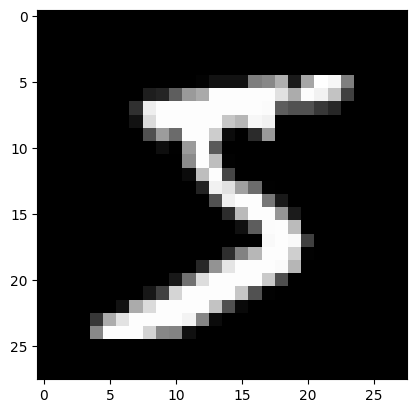

In [ ]:
#本段程式可以不執行，純粹查看單張圖片的像素數值
print("label:",training_labels[0])       #顯示0-9類別
print("image:\n",training_images[0])      #顯示28x28像素的灰階數值(0-255)
import matplotlib.pyplot as plt       
plt.imshow(training_images[0],cmap='gray')   #顯示單張圖片

In [ ]:
training_images = training_images/255.0   #所有training_images圖片像素的灰階數值原為0-255，現在限定在0-1之間
test_images = test_images/255.0       #所有test_images圖片像素的灰階數值原為0-255，現在限定在0-1之間

In [ ]:
#本行可不執行，純觀察灰階數值原本0-255變為0-1
print(training_images[0])           

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model = tf.keras.models.Sequential([          #設定類神經網路(幾層、幾個neurals、activation)
  tf.keras.layers.Flatten(),              #第1層784個neurals，把二維陣列28x28改為1維陣列784，便於後續計算
  tf.keras.layers.Dense(128, activation=tf.nn.relu),  #第2層128個neurals
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #第3層10個neural，對應到0-9共10個類別
])

In [ ]:
model.compile(                      #設定類神經網路(optimizer、loss function)
  optimizer='adam',                   #指定optimizer
  loss='sparse_categorical_crossentropy',        #指定loss function
  metrics=['accuracy']                 #當執行時顯示accuracy
)

In [ ]:
print("Now start training...")
model.fit(training_images, training_labels, epochs=5) #類神經網路執行訓練training_images圖庫60000張共5次

Now start training...
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2580 - accuracy: 0.9256
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1139 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0779 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9866


In [ ]:
print("Now start testing...")
model.evaluate(test_images, test_labels)        #測試test_images圖庫10000張的正確率

Now start testing...
313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9759


[0.08035603910684586, 0.9758999943733215]

313/313 [==============================] - 1s 2ms/step
第100張圖片
預測數字為0-9的信心指數：
 [0.08537497 0.08537513 0.08537495 0.08547403 0.08537665 0.08537495
 0.08537495 0.08553554 0.08537496 0.23136382]
預測最可能的數字： 9


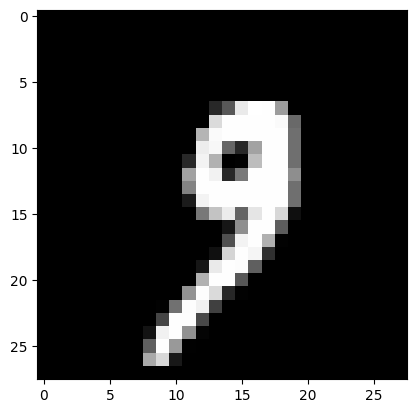

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)   #使用訓練好的類神經網路，辨識圖庫test_images的結果

import numpy as np
print('第100張圖片')                      #指定顯示第100張圖片
print('預測數字為0-9的信心指數：\n',predictions[1000])    #預測數字為0-9的信心指數
print('預測最可能的數字：',np.argmax(predictions[1000]))    #預測最有信心的數字
plt.imshow(test_images[1000],cmap='gray')           #顯示指定的圖片

# 測試

**測試一：**利用上述訓練好的類神經網路，自己指定一個編號的test_images[]圖片來測試看看。(i=0~9999)
1. 電腦判斷圖片的結果是對或錯？查看左右夥伴的測試結果。
2. 觀察信心指數為何？

第4523張圖
預測數字為0-9的信心指數：
 [0.08534932 0.08534822 0.08534732 0.08539086 0.08534727 0.08536878
 0.08534727 0.08535081 0.23180257 0.08534753]
預測最可能的數字： 8


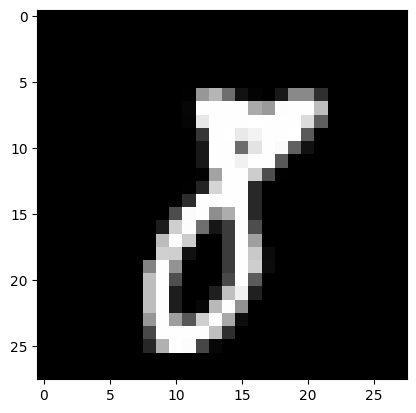

In [ ]:
i = 4523                        #指定圖片編號(0-9999)，讓電腦預測圖片中的數字。
print('第{:d}張圖'.format(i))
print('預測數字為0-9的信心指數：\n',predictions[i])    #預測數字為0-9的信心指數
print('預測最可能的數字：',np.argmax(predictions[i]))    #預測最有信心的數字
plt.imshow(test_images[i],cmap='gray')           #顯示指定的圖片

**測試二：**隨機指定一個數字(修改i=0-9900)，同時觀察連續100張圖片的預測結果，預測錯誤的部分以紅字顯示，括號內為正確類別。

第4623到4722張圖片的辨識結果


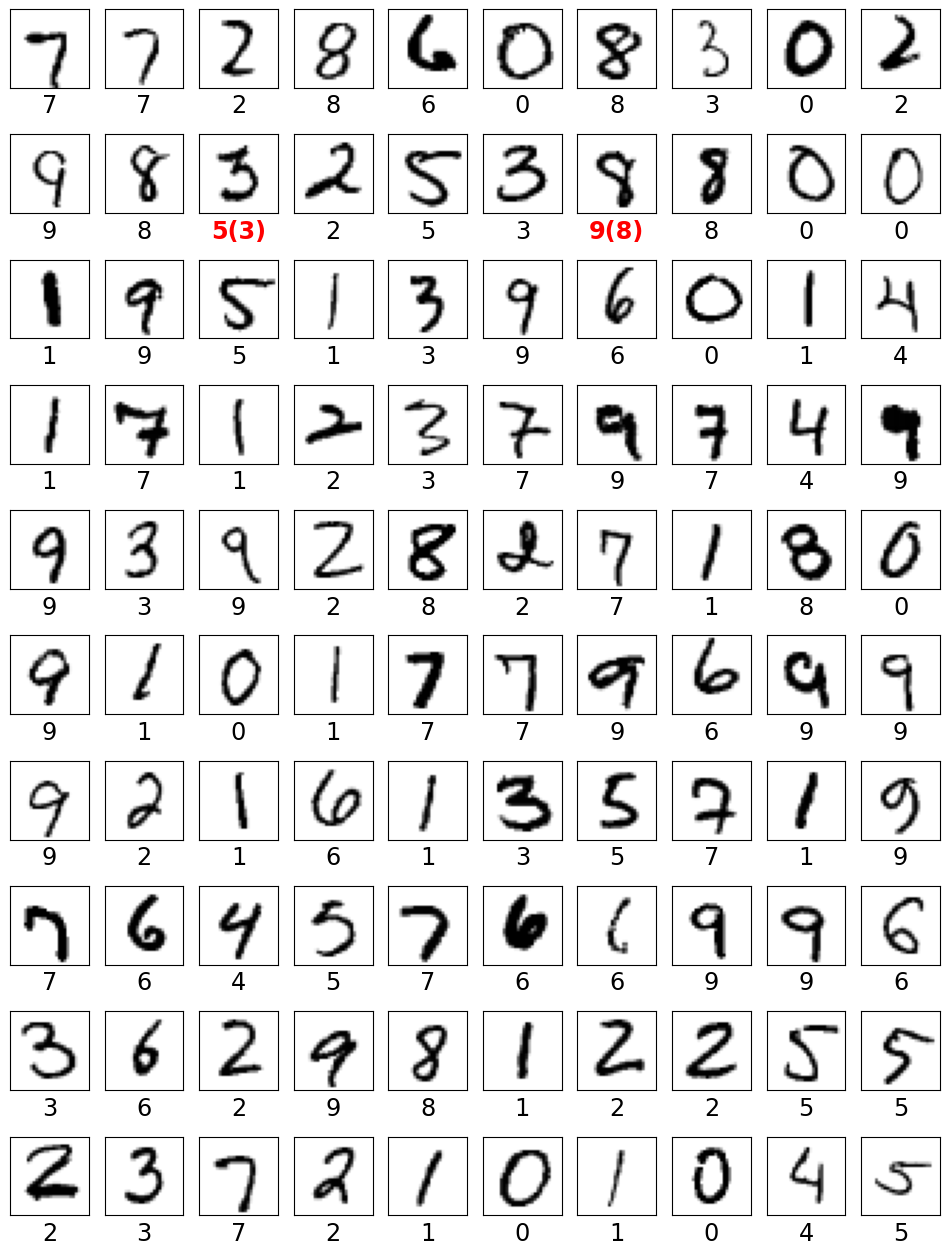

In [ ]:
plt.figure(figsize=(12,16))
base = 4623            #指定第1張圖片編號
print('第{:d}到{:d}張圖片的辨識結果'.format(base, base+99))
for i in range(100):         #連續預測100張圖片
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[base+i], cmap=plt.cm.binary)
    if(test_labels[base+i]==np.argmax(predictions[base+i])):
      plt.xlabel(np.argmax(predictions[base+i]),color='black',size='xx-large')      #正確，黑字
    else:
      thestr = str(np.argmax(predictions[base+i])) + '(' + str(test_labels[base+i]) + ')'
      plt.xlabel(thestr,color='red',size='xx-large', weight='bold')           #錯誤，粗紅字，括號內為正確類別
plt.show()

# 觀察與討論：
1.上面的數字辨識成功比率如何？潦草的字連我們都要猜測。

2.epoch=1到epoch=5的過程中，accuracy逐漸增加，loss逐漸下降，表示什麼意思？

3.比較一下左右夥伴執行model.fit的結果，每一個人在epoch=1~5每一個階段所顯示的accuracy都不一樣，為什麼？

（如果要自己測試與觀察多次執行的accuracy，記得每一次都先點選「**執行階段/重新啟動執行階段**」。）

4.比較一下左右夥伴的執行結果，test_images的accuracy是不是都比training_images的accuracy小呢？為什麼？

5.自己執行兩三次model.evaluate(test_images,test_labels)，結果有不一樣嗎？為什麼？